# Import Packages

In [1]:
import pandas as pd
import os
import numpy as np

#Own packages
import louvainFunctions as lF
import gmm
#import markergeneFunctions as mgF
import plotumapFunctions as puF

os.chdir(r'C:\Users\Asus\OneDrive\Documents\YEAR 1\ML\Project')
print(os.getcwd())
print(os.listdir())

C:\Users\Asus\Anaconda3\envs\mlproject\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Asus\OneDrive\Documents\YEAR 1\ML\Project
['02620_Project', 'data', 'umap.jpg']


# Load Data

In [2]:
data = pd.read_csv(os.path.join(r'./data', 'reduced_sample_20_PCs.csv')).to_numpy()
print(data.shape)

(499, 20)


# Run GMMs

# Test against GMMs from package

In [ ]:
from sklearn.mixture import GaussianMixture as gmm

membership_arr_package = GaussianMixture(n_components=2, random_state=0).fit_predict(data)

# Run Louvain

In [3]:
membership_arr = lF.louvain_clustering(data, k=5)

Starting Louvain clustering


# Test against Louvain from package

In [5]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import community as community_louvain

edge_list, edge_weights = lF.create_kNN_graph(data, 5)
G=nx.Graph()
G.add_edges_from(edge_list)

#first compute the best partition
partition = nx_comm.louvain_communities(G)

membership_arr_package = np.zeros((len(data)))
for i in range(len(partition)):
    for n in partition[i]:
        membership_arr_package[n] = i
        

# Plot UMAP

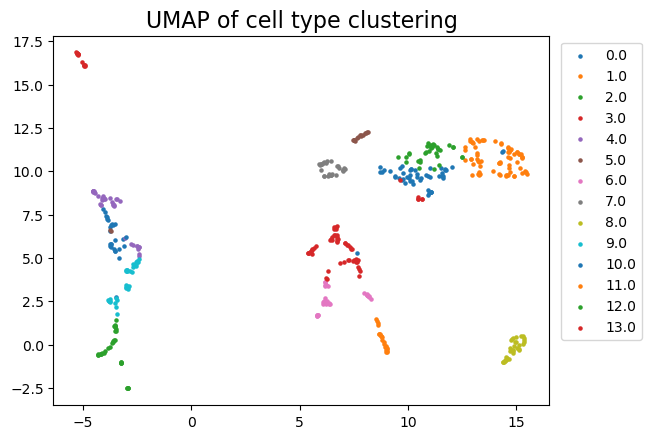

In [6]:
puF.plot_umap(data, membership_arr)
puF.plot_umap(data, membership_arr_package)